# Semicustom digital design crashbook

## Sources

### RTL description (Verilog)

The OpenROAD workflow takes the circuit's RTL description as an input. For instance, it can be a three bits XOR gate.


<blockquote><details>

<summary>
    
#### ↕️ Types in Verilog

</summary>
    
```verilog
// Three scalar nets
wire op_b, op_a, result;
// One 16-bit net
wire [15:0] word_bus;
// 1K-array of 8-bit nets
wire [7:0] byte_array [0:1023];
```
    
</details></blockquote>

<blockquote><details>

<summary>
    
#### ↕️ Assignation (non-blocking) in Verilog

</summary>
    
```verilog
// 16-bit, hexadecimal constant
assign address = 16'hCAFE;
// Unsized, decimal constant
assign counter = 'd42;
// 1-bit, binary constant
assign answer = 1'b1;

// Ternary assignation
assign muxed = which ? source_1 : source_2;

// Concatenation
assign padded_packet = {5'b00000,body,suffix};
// Replication
assign odd_mask = {10{2'b10}};

// Indexing
assign one_bit = bus[4];
assign bits = bus[15:12];
```
    
</details></blockquote>

<blockquote><details>

<summary>
    
#### ↕️ Operators in Verilog

</summary>
    
```verilog
// Addition, substraction, negation
assign sum = op_a + op_b; assign sub = op_a + op_b; assign opp = -op_a
// Multiplication, division, modulo
assign prod = op_a * op_b; assign div = op_a / op_b; assign rem = op_a & op_b
    
// Bitwise not, or, and, xor
assign n = ~m; assign a = b | c; assign d = e & f; assign x = y ^ z

// Logical not, and, or
assign ans = !v; assign ans = v || w; assign ans = v && w;
// Logical equality, difference
assign ans = v == w; assign ans = v != w;
// Relations (strictly) greater, (strictly) lower than
assign sg = a > b; assign gt = a >= b; assign sl = a < b; assign lt = a <= b;
    
// Left, right shift by n bits
assign l << n; assign r >> n;
// Left, right arithmetic shift by n bits
assign l <<< n; assign r >>> n;
```
    
</details></blockquote>

In [1]:
%%writefile v/xor3.v
module xor3(
    input wire a,
    input wire b,
    input wire c,
    output wire out
);
    assign out = a ^ b ^ c;
endmodule

Writing v/xor3.v


### Configuration file (JSON)

A configuration file should be provided. It describes constraints and strategies applied during synthesis and implementation of the circuit.

In [4]:
%%writefile build/config.json
{
    "DESIGN_NAME": "xor3",
    "VERILOG_FILES": "dir::../v/xor3.v",
    "CLOCK_TREE_SYNTH": false,
    "CLOCK_PORT": null,
    "FP_SIZING": "absolute",
    "DIE_AREA": "0 0 35 45",
    "FP_PDN_AUTO_ADJUST": false,
    "FP_PDN_VOFFSET": 0,
    "FP_PDN_HOFFSET": 0,
    "DIODE_INSERTION_STRATEGY": 3
}

Overwriting build/config.json


## Workflow
The provided `flow.tcl` is a script describing the OpenROAD workflow. A _GDS_ file will be generated using the RTL circuit description, the PDK and the configuration file.

In [5]:
%env PDK=sky130A
!flow.tcl -design build

env: PDK=sky130A
OpenLane 2023.04.07_0_gcb634fd5-conda
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Using configuration in 'build/config.json'...
[INFO]: PDK Root: /home/pierre/anaconda3/envs/semicustom/share/pdk
[INFO]: Process Design Kit: sky130A
[INFO]: Standard Cell Library: sky130_fd_sc_hd
[INFO]: Optimization Standard Cell Library: sky130_fd_sc_hd
[WARNING]: DIODE_INSERTION_STRATEGY is now deprecated; use GRT_REPAIR_ANTENNAS, DIODE_ON_PORTS and RUN_HEURISTIC_DIODE_INSERTION instead.
[INFO]: DIODE_INSERTION_STRATEGY set to 3. Setting GRT_REPAIR_ANTENNAS to 1
[INFO]: Run Directory: /home/pierre/Bureau/freechips/semicustom/build/runs/RUN_2023.05.03_00.24.56
[INFO]: Preparing LEF files for the nom corner...
[INFO]: Preparing LEF files for the min corner...
[INFO]: Preparing LEF files for the max corner...
[STEP 1]
[INFO]: Running Synthesis (log: build/runs/RUN

## Output products

### Display layout

The implemented layout can be retrieved as follows:

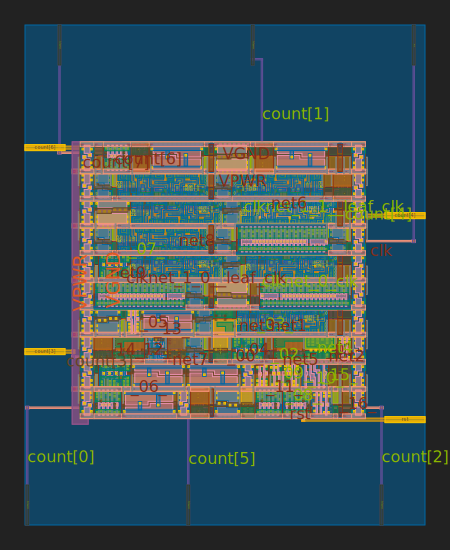

In [12]:
import glob
import gdstk
import IPython.display

gdsii = sorted(glob.glob("./build/runs/*/results/final/gds/*.gds"))[-1]
top = gdstk.read_gds(gdsii).top_level()
top[0].write_svg('svg/inverter.svg')
IPython.display.SVG('svg/inverter.svg')

### Reporting

Many reports are available under:

```
freeechips/semicustom/runs/RUN_YYYY.MM.DD_HH.MM.SS/reports/.
```

An overview of the main figures can be retrieved as well:

In [7]:
import glob
import pandas as pd
pd.options.display.max_rows = None

pd.read_csv(sorted(glob.glob("./build/runs/*/reports/metrics.csv"))[-1]).T

,0
design,/home/pierre/Bureau/freechips/semicustom/build
design_name,xor3
config,RUN_2023.05.03_00.24.56
flow_status,flow completed
total_runtime,0h0m18s0ms
routed_runtime,0h0m9s0ms
(Cell/mm^2)/Core_Util,7619.047619
DIEAREA_mm^2,0.001575
CellPer_mm^2,3809.52381
OpenDP_Util,7.16


# To have fun going further...

## Sequential circuits in Verilog

The tutorial above focuses on combinational circuits. Sequential circuits can obviously be described in Verilog as well. Sequential blocks feature an `always` block. Refer to the vendor's reference to get the sensitivity list's syntax (e.g. to determine if reset is synchronous or asynchronous).

<blockquote><details>

<summary>
    
#### ↕️ Sequential structures in Verilog

</summary>

Nets which store data are declared as `reg`s:
    
```verilog
// Three scalar register
reg op_b, op_a, result;
// One 16-bit register
reg [15:0] word_bus;
// 1K-array of 8-bit registers
reg [7:0] byte_array [0:1023];
```

The following structure updates the memory points:
    
```verilog
always @(posedge clk or negedge rst) begin
  if (!rst) begin 
    counter <= 0;
  end else begin
    counter <= counter + 1;
  end
end
```
    
</details></blockquote>

Advanced structures like the `case` structure can be used to describe finite state machines. FSM decoders can be described in an abstract way using `always` blocks in a fully combinational way:

<blockquote><details>

<summary>
    
#### ↕️ Advanced structures in Verilog

</summary>

```verilog
    
/*
 *   Case structure
 */
    
case (state)

  3'b000: idle_led <= 1'b1;
  
  3'b001,
  3'b010: work_led <= 1'b1;
  
  3'b011: begin
    muxed <= spi_1;
    work_led <= 1'b1;
  end
  
  default: begin
    muxed <= 0;
    work_led <= 1'b0; 
    idle_led <= 1'b1;
  end

endcase

/*
 *   Combinational always structure
 *     To describe priorities in a procedural fashion,
 *     use blocking `<=` assignations instead of
 *     non-blocking `=` assignations.
 */
                
always @( * ) begin
  flag <= 1'b0;
  if (error) begin 
    flag <= 1'b1;
  end
end
```

</details></blockquote>
    
The counter example can be synthetized:

In [8]:
%%writefile v/cnt.v
module cnt(
    input wire clk,
    input wire rst,
    output wire [7:0] count
);

  reg [7:0] counter;
  assign count = counter;

  always @(posedge clk or negedge rst) begin
    if (!rst) begin 
      counter <= 0;
    end else begin
      counter <= counter + 1;
    end
  end

endmodule

Writing v/cnt.v


For sequential circuits, one must specify to synthesize the clock tree as well:

In [10]:
%%writefile build/config.json
{
    "DESIGN_NAME": "cnt",
    "VERILOG_FILES": "dir::../v/cnt.v",
    "CLOCK_TREE_SYNTH": true,
    "CLOCK_PORT": "clk",
    "FP_SIZING": "absolute",
    "DIE_AREA": "0 0 40 50",
    "FP_PDN_AUTO_ADJUST": false,
    "FP_PDN_VOFFSET": 0,
    "FP_PDN_HOFFSET": 0,
    "DIODE_INSERTION_STRATEGY": 3
}

Overwriting build/config.json


The flow can be started:

In [11]:
%env PDK=sky130A
!flow.tcl -design build

env: PDK=sky130A
OpenLane 2023.04.07_0_gcb634fd5-conda
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Using configuration in 'build/config.json'...
[INFO]: PDK Root: /home/pierre/anaconda3/envs/semicustom/share/pdk
[INFO]: Process Design Kit: sky130A
[INFO]: Standard Cell Library: sky130_fd_sc_hd
[INFO]: Optimization Standard Cell Library: sky130_fd_sc_hd
[WARNING]: DIODE_INSERTION_STRATEGY is now deprecated; use GRT_REPAIR_ANTENNAS, DIODE_ON_PORTS and RUN_HEURISTIC_DIODE_INSERTION instead.
[INFO]: DIODE_INSERTION_STRATEGY set to 3. Setting GRT_REPAIR_ANTENNAS to 1
[INFO]: Run Directory: /home/pierre/Bureau/freechips/semicustom/build/runs/RUN_2023.05.03_00.26.40
[INFO]: Preparing LEF files for the nom corner...
[INFO]: Preparing LEF files for the min corner...
[INFO]: Preparing LEF files for the max corner...
[STEP 1]
[INFO]: Running Synthesis (log: build/runs/RUN

The cell above can be reused to display the lyaout.

## High-Level Synthesis (HLS)

RTL description of circuits does not follow an imperative programming paradigm. It is a description language that produces highly parallelized designs.

High-Level Synthesis provides an imperative language and a compiler that synthesizes the imperative instructions into RTL. For instance, _XLS_ provides a _Rust_-like language:

In [13]:
%%writefile xls/x/find_max.x

//
// Input:  an array of 32-bit unsigned integers (u32) of parametrized length N
// Output: the largest element of the array
//
pub fn find_max<N: u32>(array: u32[N]) -> u32 {
  let max: u32 = u32:0;
  for (i, max): (u32, u32) in range(u32:0,N) {
    if (array[i] > max) {array[i]} else {max}
  }(max)
}

//
// Input:  an array of 32-bit unsigned integers (u32) of parametrized length 4
// Output: the largest element of the array
//
pub fn find_max_impl(array: u32[4]) -> u32 {
  find_max<u32:4>(array)
}
    
#[test]
fn find_max_impl_test() {
  let _= assert_eq(find_max_impl(u32[4]:[45,3,15,6]), u32:45);
  let _= assert_eq(find_max_impl(u32[4]:[3,45,15,6]), u32:45);
  let _= assert_eq(find_max_impl(u32[4]:[15,3,45,6]), u32:45);
  let _= assert_eq(find_max_impl(u32[4]:[6,3,15,45]), u32:45);
}

#[test]
fn find_max_test() {
  let _= assert_eq(find_max<u32:1>(u32[1]:[39]), u32:39);
  let _= assert_eq(find_max<u32:2>(u32[2]:[4,90]), u32:90);
  let _= assert_eq(find_max<u32:3>(u32[3]:[7,21,15]), u32:21);
  let _= assert_eq(find_max<u32:8>(u32[8]:[1,3,45,1,5,56,0,34]), u32:56);
}

Writing xls/x/find_max.x


Testing, parsing and linting can be performed prior to RTL synhesis:

In [14]:
!interpreter_main xls/x/find_max.x

[ RUN UNITTEST  ] find_max_impl_test
[            OK ]
[ RUN UNITTEST  ] find_max_test
[            OK ]
[===============] 2 test(s) ran; 0 failed; 0 skipped.


Now that the imperative instructions are tested, the RTL design can be synthesized by _XLS_:

In [15]:
XLS_DESIGN_NAME = 'find_max_impl'
XLS_DESIGN_FILE = 'find_max'
!ir_converter_main --top={XLS_DESIGN_NAME} xls/x/{XLS_DESIGN_FILE}.x > xls/ir/{XLS_DESIGN_FILE}.ir
!opt_main xls/ir/{XLS_DESIGN_FILE}.ir > xls/ir/{XLS_DESIGN_FILE}_opt.ir
!codegen_main --generator=combinational xls/ir/{XLS_DESIGN_FILE}_opt.ir > v/{XLS_DESIGN_FILE}.v
!cat v/{XLS_DESIGN_FILE}.v

module __find_max__find_max_impl(
  input wire [127:0] array,
  output wire [31:0] out
);
  wire [31:0] array_unflattened[4];
  assign array_unflattened[0] = array[31:0];
  assign array_unflattened[1] = array[63:32];
  assign array_unflattened[2] = array[95:64];
  assign array_unflattened[3] = array[127:96];
  wire [31:0] array_index_74;
  wire [31:0] array_index_75;
  wire [31:0] array_index_78;
  wire [31:0] sel_79;
  wire [31:0] array_index_82;
  wire [31:0] sel_83;
  assign array_index_74 = array_unflattened[2'h1];
  assign array_index_75 = array_unflattened[2'h0];
  assign array_index_78 = array_unflattened[2'h2];
  assign sel_79 = array_index_74 > array_index_75 ? array_index_74 : array_index_75;
  assign array_index_82 = array_unflattened[2'h3];
  assign sel_83 = array_index_78 > sel_79 ? array_index_78 : sel_79;
  assign out = array_index_82 > sel_83 ? array_index_82 : sel_83;
endmodule


## Verilog simulation

A test bench can be written to simulate the `xor3` circuit described above:

In [16]:
%%writefile tb/xor3_tb.v
module xor3_tb;

  wire value;
  reg w1, w2, w3;
  initial begin
    $dumpfile("tb/xor3_tb.vcd");
    $dumpvars(0,xor3_tb);
    # 0 w1 = 0; w2 = 0; w3 = 0;
    # 5 w1 = 0; w2 = 0; w3 = 1;
    # 5 w1 = 0; w2 = 1; w3 = 0;
    # 5 w1 = 0; w2 = 1; w3 = 1;
    # 5 w1 = 1; w2 = 0; w3 = 0;
    # 5 w1 = 1; w2 = 0; w3 = 1;
    # 5 w1 = 1; w2 = 1; w3 = 0;
    # 5 w1 = 1; w2 = 1; w3 = 1;
    # 5 $finish;
  end

  xor3 xor3_i (w1, w2, w3, value);

  initial
     $monitor("At time %t, value = %h (%0d)",
              $time, value, value);
endmodule

Writing tb/xor3_tb.v


The simulation can then be performed using _Icarus Verilog_:

In [17]:
!iverilog -o tb/xor3_tb tb/xor3_tb.v v/xor3.v
!vvp tb/xor3_tb

VCD info: dumpfile tb/xor3_tb.vcd opened for output.
At time                    0, value = 0 (0)
At time                    5, value = 1 (1)
At time                   15, value = 0 (0)
At time                   20, value = 1 (1)
At time                   25, value = 0 (0)
At time                   35, value = 1 (1)
tb/xor3_tb.v:16: $finish called at 40 (1s)


The waveforms are dumped in a `.vcd` file, located under:

```
tb/xor3_tb.vcd
```

It can be opened with https://vc.drom.io/ for instance.

## Some ideas...

Here are a couple ideas to spend a good time exploring those beautiful pieces of software:

 * Play with RTL2GDS configuration parameters and observe the impact on the layout.
 * Simulate the `cnt` sequential circuit.
 * Simulate the `find_max_impl` circuit synthesized using HLS.
 * Try to make _Klayout_ GUI work (no warranty).

 **Do not start from scratch! Use the provided examples, examples you can find on the internet and the documentation to adapt from them!**
 
 > Good luck and read the docs. 😉
 
## More food for the brain

 * GDS2RTL flow configuration parameters: https://armleo-openlane.readthedocs.io/en/latest/docs/source/configuration.html
 * DSLX language reference: https://google.github.io/xls/dslx_reference/

# References
Inspired from:
“Silicon Notebooks.” CHIPS Alliance, Apr. 08, 2023. Accessed: Apr. 10, 2023. [Online]. Available: https://github.com/chipsalliance/silicon-notebooks/blob/b65134a43b01ae31423f7ee87110740b2257ac42/digital-inverter-openlane.ipynb (Apache License 2.0)